In [20]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from matplotlib.pyplot import plot

calls_service = pd.read_csv('mfdems.csv') # EMS Calls for Service Milwaukee
liq_lic = pd.read_csv('liquorlicenses.csv') # Liquor License data Milwaukee
## https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi
nat_irs_16 = pd.read_csv('16zpallagi.csv') # IRS Data 2016

In [21]:
mke_zip = [x for x in calls_service['ZIP Code'].unique().astype(int) if ~np.isnan(x)]
mke_ald = [x for x in calls_service['Aldermanic District'].unique().astype(int) if ~np.isnan(x)]
mke_irs_16 = nat_irs_16[nat_irs_16['zipcode'].isin(mke_zip)]
mke_irs_16

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
174830,55,WI,53051,1,5240,4460,530,230,1980,4570,...,2360,1824,0,0,0,0,480,302,4070,4469
174831,55,WI,53051,2,3810,2530,850,370,1680,5600,...,3490,9943,0,0,0,0,660,789,3050,5726
174832,55,WI,53051,3,2820,1340,1210,230,1420,5220,...,2740,16056,0,0,0,0,650,1174,2070,4988
174833,55,WI,53051,4,2290,480,1660,130,1130,5440,...,2270,19562,0,0,0,0,590,1398,1640,4875
174834,55,WI,53051,5,3880,350,3430,100,1900,11110,...,3860,66942,20,8,0,0,1340,4769,2390,9419
174835,55,WI,53051,6,1320,90,1210,0,780,4300,...,1320,123461,720,1272,690,1313,630,11405,560,7001
175046,55,WI,53110,1,3310,2550,310,430,1310,4200,...,1460,1220,0,0,0,0,240,175,2690,4718
175047,55,WI,53110,2,2680,1600,600,450,1130,4650,...,2350,6441,0,0,0,0,380,413,2290,5220
175048,55,WI,53110,3,1550,720,670,150,780,3010,...,1500,8970,0,0,0,0,380,706,1150,2815
175049,55,WI,53110,4,920,180,700,50,460,2240,...,920,7928,0,0,0,0,230,419,670,1938


In [71]:
agi_by_zip = mke_irs_16[['zipcode','agi_stub','N1']].pivot(index='zipcode',columns='agi_stub',values='N1')

pop_by_zip = mke_irs_16[['zipcode','N1']].groupby(['zipcode']).agg(['sum'])['N1']

errythang = pop_by_zip.join(agi_by_zip)
errythang.head()

,sum,1,2,3,4,5,6
zipcode,,,,,,,
53051,19360,5240,3810,2820,2290,3880,1320
53110,9290,3310,2680,1550,920,770,60
53130,4150,1220,940,670,470,730,120
53132,17430,4750,3140,2440,2120,3880,1100
53154,18000,5240,4150,2940,2080,3170,420


In [ ]:
errythang.transform({
    1:lambda x: x.sum()/errythang['sum'].sum(),
    2:lambda x: x.sum()/errythang['sum'].sum()
})

In [ ]:
service_by_zip = calls_service[["ZIP Code","Original Call for Service Type"]].groupby(['ZIP Code'], as_index=True).agg(['count']).sort_values(by='ZIP Code', ascending=True)['Original Call for Service Type']
service_by_zip.columns = ['# of Service Calls']

In [4]:
df=calls_service
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Incident Date'] = df['Incident Date'].dt.strftime('%Y-%m')

In [5]:
any_service_call = df[['Aldermanic District','Final Call for Service Type']].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
any_service_call.columns = ['# of Service Calls']

In [6]:
cardiac = calls_service[calls_service['Final Call for Service Type']=='Cardiac or Respiratory Arrest/Death'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
cardiac.columns = ['Incidents of Cardiac or Respiratory Arrest/Death']

In [7]:
downgraded = calls_service[calls_service['Final Call for Service Type']=='Downgraded Response'].groupby(['Aldermanic District'], as_index=False).agg(['count'])['Final Call for Service Type']
downgraded.columns = ['Incidents of Downgraded Response']

In [8]:
liq_avail = liq_lic[['ALDERMANIC_DISTRICT','EXP_DATE']].groupby(['ALDERMANIC_DISTRICT'], as_index=True).agg(['count']).sort_values(by='ALDERMANIC_DISTRICT', ascending=True)
liq_avail = liq_avail['EXP_DATE']
liq_avail.columns=['# of Places with Liquor Licenses']
#liq_avail.head()

In [9]:
card_liq_down = cardiac.merge(liq_avail,left_index=True,right_index=True,how='left').merge(downgraded,left_index=True,right_index=True,how='left')
all_stuff = any_service_call.merge(card_liq_down,left_index=True,right_index=True,how='left')
all_stuff.sort_values(by='# of Service Calls', ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
15.0,12867,96,58,362
6.0,11953,82,99,206
4.0,11200,86,269,301
1.0,10595,68,35,194
7.0,10492,81,30,263


In [10]:
all_stuff.sort_values(by='Incidents of Cardiac or Respiratory Arrest/Death',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
9.0,8024,106,32,106
13.0,4718,97,91,92
15.0,12867,96,58,362
4.0,11200,86,269,301
6.0,11953,82,99,206


In [11]:
all_stuff.sort_values(by='# of Places with Liquor Licenses',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
4.0,11200,86,269,301
3.0,3941,56,188,119
12.0,7033,81,188,206
14.0,3644,54,124,79
6.0,11953,82,99,206


In [12]:
all_stuff.sort_values(by='Incidents of Downgraded Response',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
15.0,12867,96,58,362
4.0,11200,86,269,301
7.0,10492,81,30,263
2.0,8807,77,22,248
6.0,11953,82,99,206


In [13]:
## Notice that District 4 is in the top five of all three lists!
## That's not a good thing

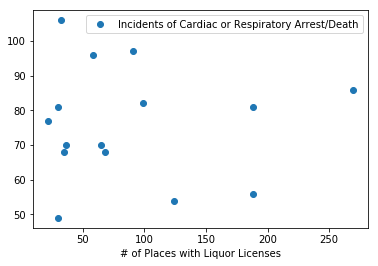

In [14]:
all_stuff.plot(x='# of Places with Liquor Licenses',y='Incidents of Cardiac or Respiratory Arrest/Death', style='o')
all_stuff.plot(x='# of Places with Liquor Licenses',y='Incidents of Downgraded Response', style='o')

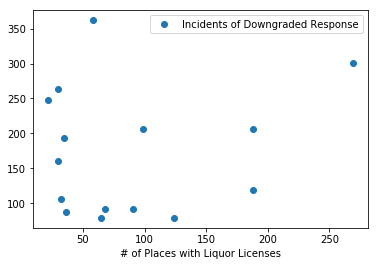